In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
from datetime import date
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-07 21:04:07.419379: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 21:04:07.422409: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 21:04:07.481600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 21:04:07.482877: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
330703,1589269063,The Five Love Languages: The Secret to Love th...,19.25,A3PCVWXJ0NL2GW,Deborah,0/0,5.0,1356566400,"Run, Dick, Run for Marriages!",Who knew it was this simple? Dr. Chapman's ide...
1062850,B000PCESRE,The Catcher in the Rye,NaN,NaN,NaN,0/1,5.0,1085356800,great book,"this is truly a great book, i love the way the..."
2119103,0553049771,Raise The Titanic,NaN,AUHQU01D9NEAG,K. York,0/0,5.0,1360972800,One of my fave books AND movies,I know it sounds nutty and is one of those how...
2014763,B0007FJEAK,Brideshead revisited: The sacred and profane m...,NaN,A2T7JK9FLC8V0N,"S Riaz ""S Riaz""",3/3,5.0,1351728000,Brideshead Revisited,A novel which the author himself referred to a...
1621678,0373089228,Haunted Husband (Silhouette Romance),NaN,A3V42N60OWYWMH,"Merry Reader ""Sissy""",1/1,5.0,1212710400,Next-door daddy,From the back of the book:Chief of Police That...
1546175,1557361630,The Cay,NaN,AXZ26IHM7HZMY,Samantha,17/19,5.0,954115200,The Cay,This book was awesome! It started out with a b...
2252927,1566190932,Pride and Prejudice,NaN,A1796BFN7L774T,Christopher B. Jonnes,12/13,5.0,982195200,A Timeless Classic.,"For the typical male, the only thing worse tha..."
2899750,0399530703,Parenting Your Asperger Child: Individualized ...,10.85,A1HLGBLHPF8NBA,"Ruth A. Mayer ""gammaruth""",0/0,5.0,1207526400,Parenting Your Asperger Child,"My ""child"" is almost eighteen, but this is an ..."
623399,0750523115,By the Mast Divided,NaN,ATBB7JAGJZ926,"George E. Hover ""Reel Slick""",0/0,5.0,1358899200,A Great Below decks yarn,a fine sea tale from the impressed seamans vie...
1767601,B0006VUFO4,One day in the life of Ivan Denisovich (Praege...,NaN,NaN,NaN,2/3,4.0,940291200,A GRAFICAL DEPICTION OF SIBERIAN LABOR CAMPS,SOLZHENITSYN DID AN EXELLENT JOB OF DEPICTING ...


In [5]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
186863,MUTINY: A HISTORY OF NAVAL INSURRECTION,Examines mutinies that have occurred worldwide...,['Leonard F. Guttridge'],http://books.google.com/books/content?id=yea6J...,http://books.google.com/books?id=yea6JSftkBMC&...,Berkley Publishing Group,2002,http://books.google.com/books?id=yea6JSftkBMC&...,['History'],NaN
97479,Double Image,"After a harrowing experience in Bosnia, war ph...",['David R. Morrell'],http://books.google.com/books/content?id=ZkrHk...,http://books.google.com/books?id=ZkrHkYg4ji4C&...,Grand Central Publishing,2001-05-01,https://play.google.com/store/books/details?id...,['Fiction'],1.0
90346,The Temple of Shamanic Witchcraft: Meditation ...,Explore your Inner Temple—your personal sacred...,['Christopher Penczak'],http://books.google.com/books/content?id=1OFlk...,http://books.google.com/books?id=1OFlkaKSZmoC&...,Llewellyn Worldwide,2002,https://play.google.com/store/books/details?id...,"['Body, Mind & Spirit']",4.0
97793,The Ghost Downstairs,"After making a fatal mistake on the job, Lina ...",['Molly Ringle'],http://books.google.com/books/content?id=n2toP...,http://books.google.com/books?id=n2toPgAACAAJ&...,NaN,2009-03,http://books.google.com/books?id=n2toPgAACAAJ&...,['Fiction'],NaN
46130,"Woman, Thou Art Loosed! The Book and Devotiona...",Heal the Wounds of the Past! This insightful d...,['T. D. Jakes'],http://books.google.com/books/content?id=GY8uG...,http://books.google.com/books?id=GY8uGQAACAAJ&...,Bethany House Publishers,2007-10-01,http://books.google.com/books?id=GY8uGQAACAAJ&...,['Religion'],1.0
47559,THE LITTLE SISTER.,Kriminalroman.,['Raymond Chandler'],NaN,http://books.google.com/books?id=7XeDzgEACAAJ&...,NaN,1969,http://books.google.com/books?id=7XeDzgEACAAJ&...,['Crime'],NaN
139094,The Torah: A modern commentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204111,Ghost Behind Me,A young girl is pursued by a ghost from the pa...,['Eve Bunting'],http://books.google.com/books/content?id=i6nEj...,http://books.google.com/books?id=i6nEjbgIAgMC&...,NaN,1984,http://books.google.com/books?id=i6nEjbgIAgMC&...,['Ghost stories'],2.0
40176,Whispers from Our Soul: The Voice of Tahkamenon,The beautiful words of a higher spiritual enti...,"['Valerie Wilkinson', 'Russell Reed']",http://books.google.com/books/content?id=ab-UB...,http://books.google.com/books?id=ab-UBmXgbfEC&...,Hampton Roads Publishing Company Incorporated,1999,http://books.google.com/books?id=ab-UBmXgbfEC&...,"['Body, Mind & Spirit']",NaN
46624,Confessions of a First-Year Maestro: A Guide f...,"Written in journal format, this book captures ...",['Catherine Bell Robertson'],http://books.google.com/books/content?id=g4hbQ...,http://books.google.com/books?id=g4hbQAhD240C&...,Boydell & Brewer Ltd,2003,http://books.google.com/books?id=g4hbQAhD240C&...,['Education'],NaN


In [7]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
df_rating_raw.shape

(3000000, 10)

In [10]:
df_rating_raw['profileName'].nunique()

854145

In [11]:
df_rating_raw['User_id'].nunique()

1008972

In [12]:
df_data_raw.shape

(212404, 10)

In [13]:
df_data_raw['Title'].nunique()

212403

In [14]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: Unique identifier for each user performing the review. Variable with cardinality excess. 
#   - User_id: Unique identifier for each user performing the review. Variable with cardinality excess.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.
#   - Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
#       book Title will always have the same author. So, authors feature is kept and Title is removed.    
#       This feature is removed later as it will be used to join both Datasets. 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName', 'User_id','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [15]:
df_rating_processed.sample(10)

,Title,review/helpfulness,review/score,review/time,review/text
580585,Wait till next year,2/3,4.0,977097600,"When I was six, my father gave me a bright-red..."
1335522,Suburban Nation: the Rise of Sprawl and the De...,36/67,1.0,1129593600,I purchased this book hoping to get a fresh pe...
735610,Drums of Autumn Hardcover First Edition,0/0,5.0,1328054400,Drums of Autmun continues the story of Claire ...
2436402,Harvest,0/0,5.0,1360368000,I was so bored until I got almost to the end. ...
2957343,Little Men,1/1,4.0,997833600,There is not that much to say about this brill...
1536095,Cold Mountain A Novel,2/2,5.0,1146182400,I have listened to Charles Frazier's rendition...
1421508,Clan Novel: Setite,4/4,5.0,961632000,I've read everything in this series so far (th...
1875641,Shostakovich the Gadfly Cdrom,0/5,4.0,943488000,"&quot;R.Witherspoon, That says it all ! I'am h..."
807522,Pregnancy Sucks For Men: What to Do When Your ...,0/0,5.0,1312156800,This book was better than all of the other typ...
145327,Keeping Faith,7/9,5.0,960940800,"Once again, Jodi Picoult has written a masterp..."


In [16]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title',                                                        
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [17]:
df_rating_processed.isna().sum()

title          208
helpfulness      0
review           0
review_time      0
text             8
dtype: int64

In [18]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [19]:
#CLEAN THE DATASETS

In [20]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [21]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
144448,Instant Immersion English Grammar & Pronunciat...,NaN,NaN,2003,['English language']
98386,Titian: Prince of Painters (Art),"['Titian', 'Tiziano', 'Filippa M. Aliberti Gau...",Prestel Pub,1990,['Art']
120192,Ninja Soccer Moms (Samantha Shaw Mysteries),['Jennifer Apodaca'],Kensington Publishing Corp.,2005-04-01,['Fiction']
94512,Number Nine Or the Mind Sweepers,['Alan Patrick Herbert'],London : Methuen,1951,['Admirals']
141258,Practical Patent Strategies Used by Successful...,"['Eric Stasik', 'Guy Stasik']",Althos Incorporated,2003-11-01,['Law']


In [22]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [23]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [24]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [25]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
187636,Feeling Good at Work,['Annie McKee'],Harvard Business Press,['Business & Economics'],2018
138588,You know me Al;,['Ring Lardner'],Barnes & Noble Publishing,['Baseball players'],2004
20787,The Rationality of Emotion (Bradford Books),['Ronald De Sousa'],MIT Press,['Philosophy'],1990
168131,Guide to Spanish Idioms,['Peter Weibel'],McGraw Hill Professional,['Foreign Language Study'],2004
79276,The Corsican Woman: Unabridged,['Alexandre Dumas'],e-artnow,['Fiction'],2016
206133,Joyworks: The Story of Marquette Electronics (...,"['Michael J. Cudahy', 'Mike Cudahy']",Milwaukee County Historical,['Biography & Autobiography'],2002
6663,Of Heretics and Martyrs in Meiji Japan: Buddhi...,['James Edward Ketelaar'],Princeton University Press,['History'],2020
10402,A+ Complete Lab Manual,['Stephen L. Herman'],Cengage Learning,['Education'],2015
116075,A day of pleasant bread,['David Grayson'],NaN,NaN,1939
122883,The Gift of the Giggles,"['Lindy Creehan Kravec', 'George Titonis', 'Jo...",Bellaboozle Books Incorporated,['Juvenile Fiction'],2005


In [26]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [27]:
#Updating the Authors to a list.
#Updating Categories to list
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [28]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [29]:
df_rating_processed.sample(5)

,title,helpfulness,review,review_time,text
2068221,Circle of Friends,9/22,1.0,998611200,I read Circle of Friends a few years ago when ...
55931,Catspaw,0/1,5.0,978825600,You are taken on a ride perched on Cat's shoul...
227460,The Hidden Diary of Marie Antoinette (Robert A...,7/9,4.0,1125446400,"In 1769, Father Kunibert demands that thirteen..."
937168,Secrets of an Irresistible Woman: Smart Rules ...,5/5,5.0,1049760000,I have a very large library. This book and oth...
325814,"Little women, or, Meg, Jo, Beth, and Amy",5/6,5.0,948067200,"This book,was the best book I had ever read.It..."


In [30]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [31]:
df_rating_processed.sample(10)

,title,helpfulness,review,text,review_year
1009864,Sons,12/12,4.0,"After devouring ""The Good Earth,"" I was dying ...",2006
2425398,Lucifer's Hammer,0/0,5.0,I've read this book 3 or 4 times since it came...,2012
2761104,The plague,1/1,5.0,This book will stay with me for a long time.It...,2012
2559655,The Dog of the South: Library Edition,1/1,5.0,The title works because this is the single bes...,2011
2413102,"Eldest (Inheritance, Book 2)",11/16,5.0,I really loved this book. That's why I gave it...,2005
1931599,Lord of the Silent,1/1,5.0,"This is an awesome book, blending romance, int...",2012
303071,Forbidden Flowers: More Women's Sexual Fantasies,28/30,2.0,"While the book was plentiful of wild, sensual ...",1999
1720088,Baby Whisperer Solves All Your Problems,10/13,5.0,"Like most people, I read various parenting boo...",2005
1044702,Nathaniel,0/0,5.0,This is the type of horror story in which you ...,1996
2953667,Cane River,5/7,5.0,I loved this book! The writer does an incredib...,2006


In [32]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [33]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [34]:
df_rating_processed.sample(10)

,title,review,text,review_year,helpfulness_0,helpfulness_1
1962809,Wuthering Heights (College classics in English),5.0,"This is the only novel by Emily Bronte, one of...",2006,0.500000,0.500000
2110720,Wuthering Heights,4.0,"Though this may be a romance, it isn't one in ...",2004,0.333333,0.333333
2305005,The Lantern Bearers,4.0,"amusing story, would not reccomend for many pe...",2008,0.000000,0.000000
924577,Reporters: Memoirs of a Young Newspaperman,5.0,This book conincides with the interview I had ...,2005,1.000000,1.000000
261314,Different Dances,5.0,"These simple drawings, one or just a few per p...",2004,1.000000,1.000000
1394618,Beauty's Punishment,5.0,"Used books were received very quickly, and in ...",2010,0.333333,0.333333
1636298,Effective Interviewing and Interrogation Techn...,5.0,I've never done much of this kind of stuff bef...,2010,0.500000,0.500000
1291952,Rabble In Arms,4.0,"This novel was my first Roberts, and probably ...",2007,1.000000,1.000000
385128,Greek Myths for Young Children,5.0,This is a fantastic way to get kids reading Gr...,2012,0.000000,1.000000
2195816,Spyro the Dragon: Prima's Official Strategy Guide,5.0,This is perfect for finding all the secrets an...,2010,0.000000,1.000000


In [35]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   review          float64
 2   text            object 
 3   review_year     int64  
 4   helpfulness_0   float64
 5   helpfulness_1   float64
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 203.4+ MB


Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
        book Title will always have the same author. So, authors feature is kept and Title is removed.

In [36]:
df_all_data_processed = df_all_data_processed.drop(['title'], axis=1)

In [37]:
df_all_data_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
1082240,5.0,"Brought memories of many wonderful, frustratin...",2002,1.000000,1.000000,[Brooke McEldowney],Andrews McMeel Publishing,[Humor],2002
1395657,5.0,It is said by some to be the best novel of the...,2013,0.000000,1.000000,[J. R. R. Tolkien],NaN,"[Baggins, Bilbo (Fictitious character)]",1996
1212926,5.0,Anita Shreve outdid herself on this work. I tu...,2009,0.000000,1.000000,[Jennifer A. Nielsen],Scholastic Press,[Juvenile Fiction],2018
1916059,3.0,"As some of the other reviewers mentioned, this...",2006,1.000000,1.000000,[Ron K.C. Cheng],Cengage Learning,[Technology & Engineering],2013
2520646,5.0,Guinness Book of World Records (Dad gave it to...,2002,0.000000,0.000000,[Mark C. Young],Bantam,[Reference],2001
1438450,5.0,She: A History of Adventure is a sensual class...,2011,0.000000,0.000000,[Tanya Markul],Andrews McMeel Publishing,[Poetry],2019
1772603,5.0,This would be an excellent choice to bring bac...,2001,1.000000,1.000000,"[Charles N. Brown, William Contento]",Locus Pub,[Science fiction],1986
2078457,5.0,This book provided valuble insight into the wo...,1998,1.000000,1.000000,[James G. Simmonds],Springer Science & Business Media,[Mathematics],2012
1987776,5.0,it's the most revolutionary book in print... I...,1998,0.857143,0.857143,[Mary Baker Eddy],Aequus Institute Publications,"[Body, Mind & Spirit]",1986
448871,5.0,This is a must read book for married couples (...,2012,1.000000,1.000000,[Gary Chapman],Moody Publishers,[Family & Relationships],2014


In [38]:
#FIXME
# Primero Aplico al Dataset Original acoto por los años que voy a tomar
# Sobre ese valor calculo el dataset.
# Hago el train test split sobre el sample aplico el EDA.

## Dataset Filtering and Sampling

### Filtering

The hypotesis of the current analysis is predicting the review score of the review, based on the review and book information contained on this dataset.


- Microsoft Internet Explorer was first release on 1995
- Google was released on August 1996
- Yahoo! was resleased on 1994

Web Browsers History
- Safari was first released on 2003
- Firefox was first released on 2004
- Opera Browser was first release on 2005
- Google Chrome was first released on 2008
- Microsoft Edge was first released on 2015





Review Year: Based on the tools (web browsers, access to internet, culture, digitalization) available during the last decade of the reviews on the Dataset, the scope of the analysis is reduced to reviews performed from 2003 and until 2013.

In [39]:
df_all_data_processed['review_year'].describe().T

count    2.666314e+06
mean     2.005394e+03
std      4.747336e+00
min      1.969000e+03
25%      2.001000e+03
50%      2.005000e+03
75%      2.010000e+03
max      2.013000e+03
Name: review_year, dtype: float64

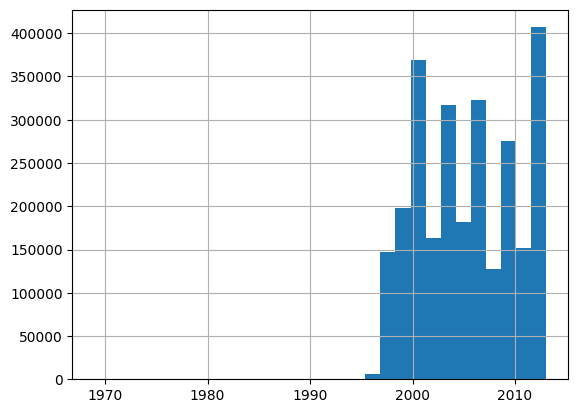

In [40]:
df_all_data_processed['review_year'].hist(bins=30)
plt.show()

In [41]:
df_all_data_processed = df_all_data_processed[df_all_data_processed['review_year']>=2003]

In [42]:
df_all_data_processed.reset_index(drop=True, inplace=True)

In [43]:
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782972 entries, 0 to 1782971
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   review          float64
 1   text            object 
 2   review_year     int64  
 3   helpfulness_0   float64
 4   helpfulness_1   float64
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 122.4+ MB


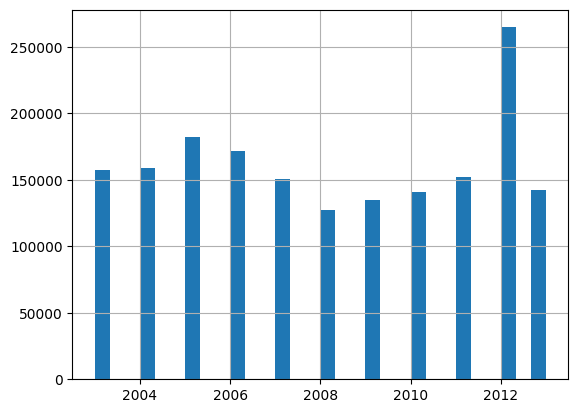

In [44]:
df_all_data_processed['review_year'].hist(bins=30)
plt.show()

Dataset is filtered by published year. Amazon Books was founded on 1995. Books published before this year are removed from the dataset. Scope is reduced to Books published during the Amazon Books Web Store existance.

In [45]:
df_all_data_processed = df_all_data_processed[(df_all_data_processed['published_year'] > 2003) & (df_all_data_processed['published_year'] <= 2013)]

In [46]:
df_all_data_processed.reset_index(drop=True, inplace=True)

In [47]:
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736644 entries, 0 to 736643
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          736644 non-null  float64
 1   text            736644 non-null  object 
 2   review_year     736644 non-null  int64  
 3   helpfulness_0   736644 non-null  float64
 4   helpfulness_1   736644 non-null  float64
 5   authors         728054 non-null  object 
 6   publisher       677789 non-null  object 
 7   categories      720895 non-null  object 
 8   published_year  736644 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 50.6+ MB


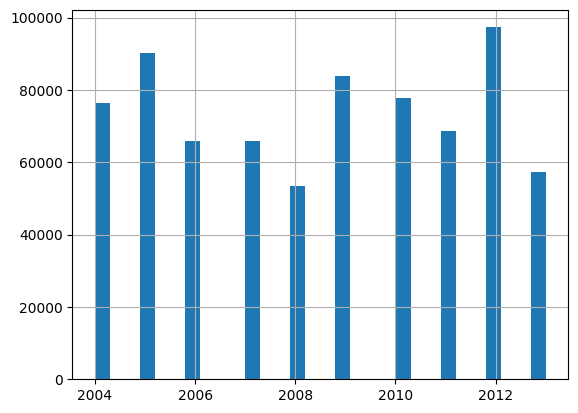

In [48]:
df_all_data_processed['published_year'].hist(bins=30)
plt.show()

In [49]:
df_all_data_processed = df_all_data_processed[df_all_data_processed['review_year'] >= df_all_data_processed['published_year']]
df_all_data_processed.reset_index(drop=True, inplace=True)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400982 entries, 0 to 400981
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          400982 non-null  float64
 1   text            400982 non-null  object 
 2   review_year     400982 non-null  int64  
 3   helpfulness_0   400982 non-null  float64
 4   helpfulness_1   400982 non-null  float64
 5   authors         395251 non-null  object 
 6   publisher       363953 non-null  object 
 7   categories      393307 non-null  object 
 8   published_year  400982 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 27.5+ MB


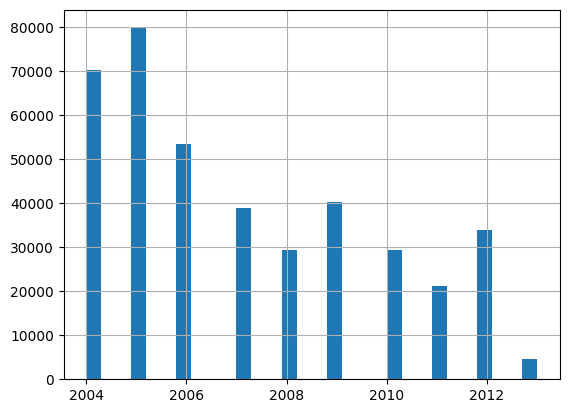

In [50]:
df_all_data_processed['published_year'].hist(bins=30)
plt.show()

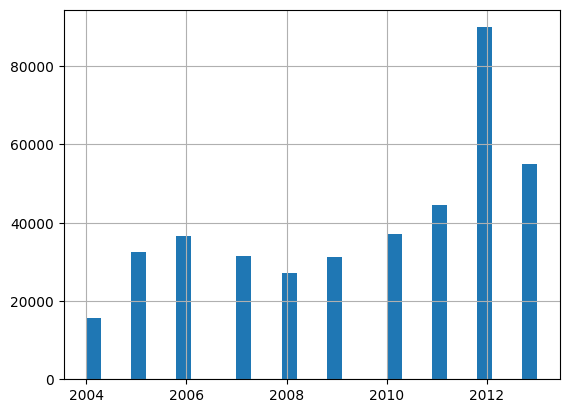

In [51]:
df_all_data_processed['review_year'].hist(bins=30)
plt.show()

### Sampling

Sample Size Calculation formula from Survey Monkey (https://www.surveymonkey.com/mp/sample-size-calculator/) is used to calculate a extract a ramdom sample of the dataset.
In order to reduce the dataset size and apply NLP to the text column.

For the given formula: 

   $$ sample size =  \frac{\frac{z^2xp(1-p)}{e^2}}{1 + \frac{z^2xp(1-p)}{e^2N}} $$

with:
- N = population size 
- e = Margin of error (percentage in decimal form) 
- z = z-score
- p = sample proportion


| Desired confidence level	| z-score |
|--------------------------|---------|
|            80%           |   1.28  |
|            85%	         |   1.44  |
|            90%	         |   1.65  |
|            95%	         |   1.96  |
|            99%	         |   2.58  |


Setting N = 400 982, e = 0.1% and z = 2.58

sample size = 15978. 

A sample of **15978** entries will be extracted from the Dataset to be processed and to train and test the model.

In [52]:
N = df_all_data_processed.shape[0] - 1
e = 0.01 #Margin of error = 0.1%
z = 2.58 # Desired confidence level = 99%, so z-score = 2.58
p = 0.5 #Used 0.5 as a conservative approach. It will give the largest sample size

sample_size = ( ((z*z)*p*(1-p))/(e*e) )/(1 + ((z*z)*p*(1-p))/(e*e*N) )

sample_size = round(sample_size)

print(f'Sample size is: {sample_size}')

Sample size is: 15978


In [53]:
#Extract the sample of 15851 entries from the dataset.
df_all_data_filtered_processed = df_all_data_processed.sample(n=sample_size, random_state=2125)

In [54]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15978 entries, 0 to 15977
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15978 non-null  float64
 1   text            15978 non-null  object 
 2   review_year     15978 non-null  int64  
 3   helpfulness_0   15978 non-null  float64
 4   helpfulness_1   15978 non-null  float64
 5   authors         15747 non-null  object 
 6   publisher       14523 non-null  object 
 7   categories      15681 non-null  object 
 8   published_year  15978 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [55]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    9464
4.0    3244
3.0    1420
1.0    1028
2.0     822
Name: count, dtype: int64

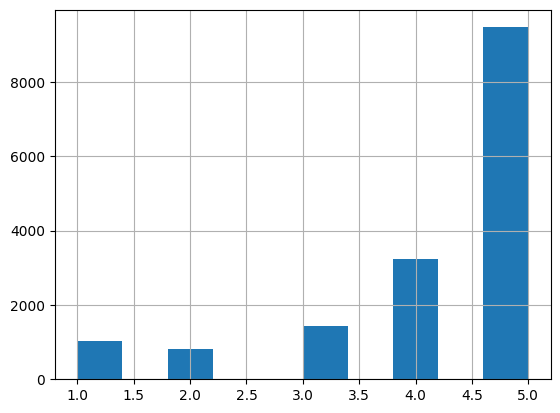

In [56]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [57]:
df_all_data_filtered_processed.isna().sum()

review               0
text                 0
review_year          0
helpfulness_0        0
helpfulness_1        0
authors            231
publisher         1455
categories         297
published_year       0
dtype: int64

In [58]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
948,5.0,I am a Music teacher for students in Kindergar...,2012,0.000000,1.000000,[Sharon Burch],Mystic Pub,[Music],2010
13911,5.0,when I read the first book in this series I th...,2009,1.000000,1.000000,"[Lynne Matallana, Ph. D. Bradley, Laurence, La...",Penguin,[Health & Fitness],2009
808,5.0,I studied media communication and am well awar...,2012,0.000000,0.000000,[Elizabeth George],Harper Collins,[Fiction],2009
6556,5.0,All of characters peopling this work actually ...,2009,1.000000,1.000000,[Emily Arnold McCully],"Farrar, Straus and Giroux (BYR)",[Juvenile Fiction],2004
5222,5.0,Honestly-- this is a book that makes you want ...,2012,0.000000,0.000000,[Susanna Clarke],Bloomsbury Publishing USA,[Fiction],2010
4456,5.0,Kat Spencer needs to get away before her weddi...,2006,1.000000,1.000000,[Dixie Dansercoer],Lannoo Uitgeverij,[Adventure and adventurers],2005
13547,4.0,My sister read both books by Tatum O'Neal and ...,2011,0.000000,0.000000,"[""Tatum O'Neal""]",Harper Collins,[Biography & Autobiography],2005
9075,5.0,What kind of life would you want to live?one w...,2011,0.500000,0.500000,[Aldous Huxley],Random House,[Fiction],2008
1132,5.0,Some books are timeless and A Woman After God'...,2010,0.000000,0.000000,[Elizabeth George],Christian Large Print,[Religion],2004
13500,5.0,I finally got my hands on one of these books.G...,2004,0.296296,0.296296,[Brian Clevinger],NaN,[Fiction],2004


In [59]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['review', 'text'])
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15738 non-null  float64
 1   text            15738 non-null  object 
 2   review_year     15738 non-null  int64  
 3   helpfulness_0   15738 non-null  float64
 4   helpfulness_1   15738 non-null  float64
 5   authors         15507 non-null  object 
 6   publisher       14295 non-null  object 
 7   categories      15441 non-null  object 
 8   published_year  15738 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [60]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
1300,5.0,I first read this book when I was 13 and have ...,2009,1.000000,1.000000,[V.C. Andrews],Simon and Schuster,[Fiction],2005
8535,5.0,I was so happy to find this. Legend of Sleepy ...,2011,0.000000,1.000000,[Washington Irving],Simon and Schuster,[Juvenile Fiction],2007
2103,1.0,This book was Christian prayers with God and J...,2006,0.944444,0.944444,[Mark Ventimiglia],Citadel Press,[Religion],2006
8926,4.0,Awesome plot I particularly liked the theme to...,2013,0.000000,1.000000,[Nathaniel Hawthorne],Penguin UK,[Adultery],2012
2741,3.0,You need a formal teacher to lead you through ...,2011,1.000000,1.000000,[刘珣],Beijing Language & Culture University Press,[Foreign Language Study],2004
14878,2.0,When I ordered this book they said it was in e...,2010,0.200000,0.200000,[Loung Ung],Harper Collins,[History],2010
5888,1.0,Hugh Farnham is a blue-collar survivalist who ...,2006,0.571429,0.571429,[Robert A. Heinlein],Baen Publishing Enterprises,[Fiction],2006
9132,4.0,The seemingly split personality between intern...,2006,0.500000,0.500000,"[Kashō Abe, Casio Abe]",Kaya Production,[Biography & Autobiography],2005
1637,5.0,Ignore old reviews about this being out of dat...,2011,1.000000,1.000000,NaN,Billiard Congress of Amer,[Sports & Recreation],2004
7931,5.0,I spent nearly a week reading this wonderful b...,2010,1.000000,1.000000,[Tama J. Kieves],Tarcher,[Self-Help],2004


# Initial EDA and Final Preprocesing

## Helpfulness Column

### Removing Outliers

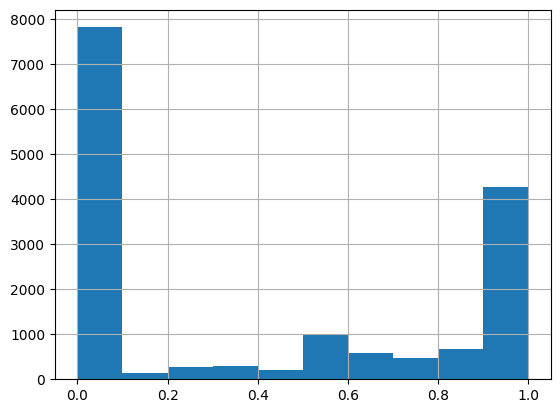

In [61]:
df_all_data_filtered_processed['helpfulness_0'].hist()
plt.show()

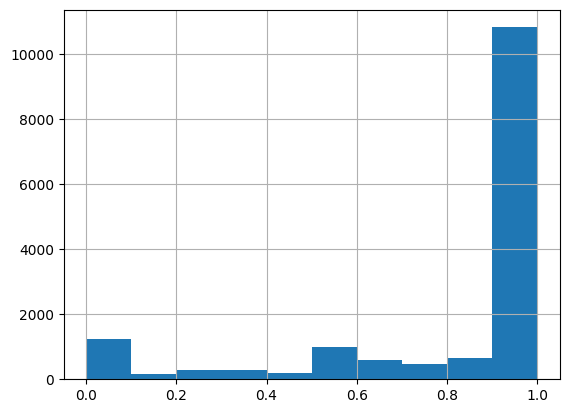

In [62]:
df_all_data_filtered_processed['helpfulness_1'].hist()
plt.show()

Porcentual helpfulness variable values should be between 0 and 1. Outliers are remove as they are just 2 entries from the entire dataset.

In [63]:
df_all_data_filtered_processed.shape

(15738, 9)

In [64]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    15738.000000
mean         0.820709
std          0.313890
min          0.000000
25%          0.750000
50%          1.000000
75%          1.000000
max          1.000000
Name: helpfulness_1, dtype: float64

In [65]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    15738.000000
mean         0.403312
std          0.438223
min          0.000000
25%          0.000000
50%          0.125000
75%          1.000000
max          1.000000
Name: helpfulness_0, dtype: float64

In [66]:
#Correlation Analysis 
df_all_data_filtered_processed[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness_0,helpfulness_1,review
helpfulness_0,1.000000,0.172201,-0.009705
helpfulness_1,0.172201,1.000000,0.290022
review,-0.009705,0.290022,1.000000


Correlation matrix shows that helpfulness_0 and helpfulness_1 are not much correlated. But helpfulness_0 and helpfulness_1 provide the same information. Based on the correlation with 'review' column, helpfulness_1 is kept and helpfulness_0 is removed. In order to avoid repeated information.

In [67]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_0'], axis=1)

In [68]:
df_all_data_filtered_processed['helpfulness'] = df_all_data_filtered_processed['helpfulness_1']
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_1'], axis=1)
df_all_data_filtered_processed.sample(5)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
15334,2.0,This book has some good basic information on w...,2005,[Lisa Ann Schreier],John Wiley & Sons,[Travel],2005,0.950000
13282,2.0,"I've read several Alex Delaware novels, and ha...",2012,[Jonathan Kellerman],"Random House Digital, Inc.",[Fiction],2010,1.000000
7483,2.0,I purchased this book after Ann Bird's appeara...,2005,[Anne Bird],William Morrow,[Biography & Autobiography],2005,0.615385
5099,5.0,this author is wonderful keeps me going I alwa...,2012,[John Saul],"Random House Digital, Inc.",[Fiction],2006,1.000000
3782,5.0,"Even though the book was published in 1890, th...",2012,[Jacob August Riis],NaN,[Poor],2009,1.000000


## Authors Column

### Authors Names Standarization

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [69]:
#The examples are:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }


In [70]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15738 non-null  float64
 1   text            15738 non-null  object 
 2   review_year     15738 non-null  int64  
 3   authors         15507 non-null  object 
 4   publisher       14295 non-null  object 
 5   categories      15441 non-null  object 
 6   published_year  15738 non-null  int64  
 7   helpfulness     15738 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 983.8+ KB


In [71]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [72]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(standardize_authors)

### Updating the Authors Feature to Categorical, and applying Pareto Principe to reduce the quantity of authors.

In [73]:
author_counts = df_all_data_filtered_processed['authors'].explode().value_counts()
author_counts

authors
J. R. R. Tolkien       594
Lewis Carroll          148
C. S. Lewis            129
Christopher Paolini    111
Charles Dickens        106
                      ... 
Jennifer Quasha          1
Alan Wood                1
Tim Reeser               1
Steve Kaplan             1
Jack D. Herrington       1
Name: count, Length: 7736, dtype: int64

In [74]:
sorted_author_counts = author_counts.sort_values(ascending=False)
sorted_author_counts

authors
J. R. R. Tolkien       594
Lewis Carroll          148
C. S. Lewis            129
Christopher Paolini    111
Charles Dickens        106
                      ... 
Paul H. Lange            1
Christine Adamec         1
The Phat Phree           1
Andru J. Reeve           1
Jack D. Herrington       1
Name: count, Length: 7736, dtype: int64

In [75]:
pareto_threshold = int(0.2 * len(sorted_author_counts))
pareto_threshold

1547

In [76]:
top_authors = sorted_author_counts.iloc[:pareto_threshold].index
top_authors

Index(['J. R. R. Tolkien', 'Lewis Carroll', 'C. S. Lewis',
       'Christopher Paolini', 'Charles Dickens', 'Aldous Huxley',
       'Eckhart Tolle', 'Viktor E Frankl', 'James Patterson',
       'Arthur Conan Doyle',
       ...
       'Martin Jones', 'Holly Robinson Peete', 'Mel Levine', 'Ward S. Albro',
       'Joseph Telushkin', 'John Rosemond', 'Scott J. Edgett',
       'Thomas Nelson Publishers', 'Jason Whitlock', 'Rochelle Schweizer'],
      dtype='object', name='authors', length=1547)

In [77]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_authors else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

1548

After applying Pareto Principle, there are still 1548 unique authors on the dataset. If authors is considered as a Categorical Feature, it will not have much predictive because it has a lot of Cardinality.

Top 10 authors with most reviews are kept and the rest of authors are set to 'Other'.

In [78]:
authors = df_all_data_filtered_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 18914 entries, 0 to 15737
Series name: authors
Non-Null Count  Dtype 
--------------  ----- 
18914 non-null  object
dtypes: object(1)
memory usage: 295.5+ KB


In [79]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 1548


In [80]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 18914


In [81]:
top_10_authors_counts = author_counts[:10].sort_values(ascending=False)
top_10_authors_counts

authors
Other                  7570
J. R. R. Tolkien        594
Lewis Carroll           148
C. S. Lewis             129
Christopher Paolini     111
Charles Dickens         106
Aldous Huxley            85
Eckhart Tolle            78
Viktor E Frankl          74
James Patterson          65
Name: count, dtype: int64

In [82]:
other_authors_counts = author_counts[10:]
other_authors_counts

authors
Arthur Conan Doyle       62
Jon Krakauer             61
Charlotte Brontë         59
Karen Marie Moning       59
Stephen King             58
                         ..
Jennifer LaBrecque        2
Wilkie Collins            2
Abigail Johnson Dodge     2
Boson Software            2
Allison Hobbs             2
Name: count, Length: 1538, dtype: int64

In [83]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_10_authors_counts else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

10

In [84]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other                  17524
J. R. R. Tolkien         594
Lewis Carroll            148
C. S. Lewis              129
Christopher Paolini      111
Charles Dickens          106
Aldous Huxley             85
Eckhart Tolle             78
Viktor E Frankl           74
James Patterson           65
Name: count, dtype: int64

In [85]:
def remove_repeated_values(in_list):
    unique_list = []
    for item in in_list:
        if item not in unique_list:
            unique_list.append(item)

    return unique_list

In [86]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
13339,4.0,You can not deny that Donald Trump is a genius...,2004,[Other],Currency,[Business & Economics],2004,0.933333
3312,4.0,This book was recommended reading to me by a r...,2010,[Other],Houghton Mifflin Harcourt,[Juvenile Nonfiction],2010,1.000000
1612,4.0,Bren finds himself in the midst of a civil war...,2007,[Other],DAW Hardcover,[Fiction],2007,1.000000
6630,5.0,Great Price with Excellent and Timely Service;...,2012,"[Other, Other]",Piatkus Books,"[Dallas, Eve (Fictitious character)]",2012,1.000000
14462,4.0,This book was wonderful and i wish it was a se...,2012,[Other],Yearling,[Juvenile Fiction],2011,1.000000


In [87]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: remove_repeated_values(x))

In [88]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
13339,4.0,You can not deny that Donald Trump is a genius...,2004,[Other],Currency,[Business & Economics],2004,0.933333
3312,4.0,This book was recommended reading to me by a r...,2010,[Other],Houghton Mifflin Harcourt,[Juvenile Nonfiction],2010,1.000000
1612,4.0,Bren finds himself in the midst of a civil war...,2007,[Other],DAW Hardcover,[Fiction],2007,1.000000
6630,5.0,Great Price with Excellent and Timely Service;...,2012,[Other],Piatkus Books,"[Dallas, Eve (Fictitious character)]",2012,1.000000
14462,4.0,This book was wonderful and i wish it was a se...,2012,[Other],Yearling,[Juvenile Fiction],2011,1.000000


In [89]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other                  14364
J. R. R. Tolkien         594
Lewis Carroll            148
C. S. Lewis              129
Christopher Paolini      111
Charles Dickens          106
Aldous Huxley             85
Eckhart Tolle             78
Viktor E Frankl           74
James Patterson           65
Name: count, dtype: int64

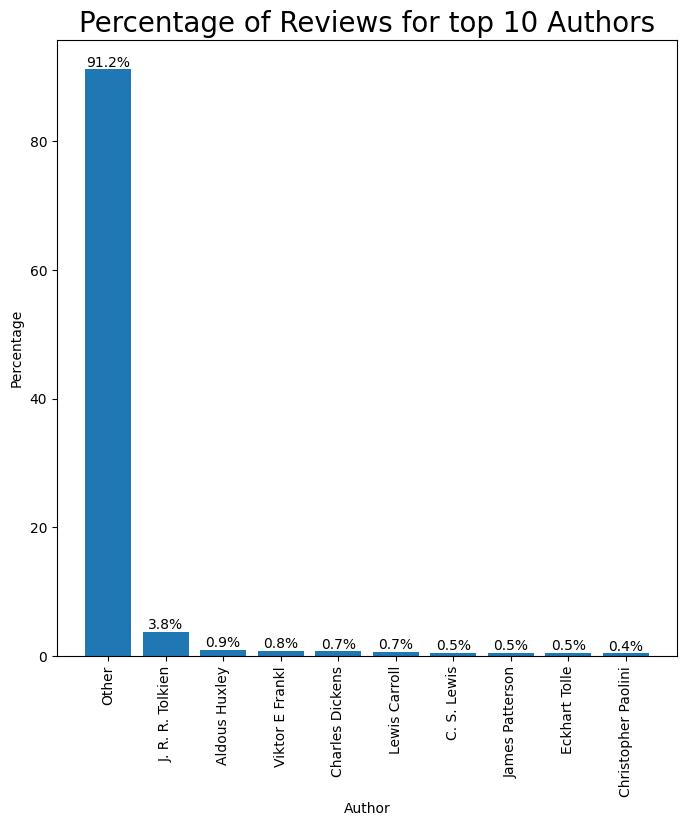

In [90]:
#Show a barplot by Percentages
author_percetage = df_all_data_filtered_processed['authors'].explode().value_counts()/df_all_data_filtered_processed['authors'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_filtered_processed['authors'].explode().unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Author')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
plt.show()

Top 10 authors only represents the 8.8% of the Total Dataset Reviews. Beacause of the Cardinality of this feature, Authors is removed from the Dataset.

In [91]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['authors'], axis=1)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15738 non-null  float64
 1   text            15738 non-null  object 
 2   review_year     15738 non-null  int64  
 3   publisher       14295 non-null  object 
 4   categories      15441 non-null  object 
 5   published_year  15738 non-null  int64  
 6   helpfulness     15738 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 860.8+ KB


## Cateogories Column

### Updating the Categories Feature to Categorical, and applying Pareto Principe to reduce the quantity of Categories.

In [92]:
categories_counts = df_all_data_filtered_processed['categories'].explode().value_counts()
categories_counts

categories
Fiction                             5102
Juvenile Fiction                    1483
Religion                             826
Biography & Autobiography            774
History                              595
                                    ... 
Motion picture plays                   1
Christianity and other religions       1
Biographical fiction                   1
Highlands (Scotland)                   1
Guilt                                  1
Name: count, Length: 439, dtype: int64

In [93]:
sorted_category_counts = categories_counts.sort_values(ascending=False)
sorted_category_counts

categories
Fiction                      5102
Juvenile Fiction             1483
Religion                      826
Biography & Autobiography     774
History                       595
                             ... 
Indian captivities              1
Czech language                  1
North Carolina                  1
Low-carbohydrate diet           1
Guilt                           1
Name: count, Length: 439, dtype: int64

In [94]:
pareto_threshold = int(0.2 * len(sorted_category_counts))
pareto_threshold

87

In [95]:
top_categories = sorted_category_counts.iloc[:pareto_threshold].index
top_categories

Index(['Fiction', 'Juvenile Fiction', 'Religion', 'Biography & Autobiography',
       'History', 'Business & Economics', 'Self-Help', 'Computers',
       'Family & Relationships', 'Cooking', 'Health & Fitness',
       'Juvenile Nonfiction', 'Mind & Spirit', 'Social Science', 'Body',
       'Sports & Recreation', 'Political Science',
       'Language Arts & Disciplines', 'Humor', 'Education', 'True Crime',
       'Crafts & Hobbies', 'Comics & Graphic Novels', 'Travel', 'Philosophy',
       'Psychology', 'Science', 'Music', 'Young Adult Fiction',
       'Foreign Language Study', 'Dragons', 'Medical', 'Art', 'Poetry',
       'Existential psychotherapy', 'Reference', 'Nature', 'Pets',
       'Performing Arts', 'Drama', 'Bibles', 'Mathematics',
       'Technology & Engineering', 'House & Home', 'Transportation',
       'Literary Criticism', 'Photography', 'Executions and executioners',
       'Games & Activities', '"Children's stories"', 'Architects',
       'Study Aids', 'Architecture', 'G

In [96]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_categories else 'Other' for category in x] if isinstance(x, list) else ['Other'])
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Fiction                                5102
Juvenile Fiction                       1483
Other                                   939
Religion                                826
Biography & Autobiography               774
                                       ... 
Banks and banking                         8
Motion picture actors and actresses       8
etc                                       7
strips                                    7
Love stories                              7
Name: count, Length: 88, dtype: int64

After applying Pareto Principle, there are still 117 unique categories on the dataset. If categories is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 categories with most reviews are kept and the rest of categories are set to 'Other'.

In [97]:
categories = df_all_data_filtered_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 16030 entries, 0 to 15737
Series name: categories
Non-Null Count  Dtype 
--------------  ----- 
16030 non-null  object
dtypes: object(1)
memory usage: 250.5+ KB


In [98]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 88


In [99]:
categories_counts = categories.value_counts(ascending=False)
print(f'Total of entries after explode Categories column {categories_counts.sum()}')

Total of entries after explode Categories column 16030


Categories are groped on 19 Categories. Based on the Literary genre.

In [100]:
top_categories_counts = categories_counts[:25].sort_values(ascending=False)
top_categories_counts

categories
Fiction                        5102
Juvenile Fiction               1483
Other                           939
Religion                        826
Biography & Autobiography       774
History                         595
Business & Economics            513
Self-Help                       293
Computers                       290
Family & Relationships          272
Cooking                         233
Health & Fitness                217
Juvenile Nonfiction             210
Mind & Spirit                   199
Body                            199
Social Science                  199
Sports & Recreation             187
Political Science               173
Language Arts & Disciplines     145
Humor                           144
Education                       141
True Crime                      139
Crafts & Hobbies                135
Comics & Graphic Novels         125
Travel                          124
Name: count, dtype: int64

After extracting the 25 top categories, some categories are grouped toguether to reduce the cardinatily of the variable.

In [101]:
categories_mapping = {
    'Fiction' : 'Fiction',
    'Juvenile Fiction' : 'Fiction',
}

In [102]:
def standardize_categories(categories):
    if isinstance(categories, list):
        return [categories_mapping.get(category, category) for category in categories]
    else:
        return categories  # Return the original value if it's not a list

In [103]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(standardize_categories)

In [104]:
categories = df_all_data_filtered_processed['categories'].explode()
categories.info()
categories_counts = categories.value_counts(ascending=False)

<class 'pandas.core.series.Series'>
Index: 16030 entries, 0 to 15737
Series name: categories
Non-Null Count  Dtype 
--------------  ----- 
16030 non-null  object
dtypes: object(1)
memory usage: 250.5+ KB


In [105]:
top_10_categories_counts = categories_counts[:10].sort_values(ascending=False)
top_10_categories_counts

categories
Fiction                      6585
Other                         939
Religion                      826
Biography & Autobiography     774
History                       595
Business & Economics          513
Self-Help                     293
Computers                     290
Family & Relationships        272
Cooking                       233
Name: count, dtype: int64

In [106]:
other_categories_counts = categories_counts[10:]
other_categories_counts

categories
Health & Fitness                       217
Juvenile Nonfiction                    210
Social Science                         199
Mind & Spirit                          199
Body                                   199
                                      ... 
Banks and banking                        8
Motion picture actors and actresses      8
etc                                      7
strips                                   7
Love stories                             7
Name: count, Length: 77, dtype: int64

In [107]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_10_categories_counts else 'Other' for category in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['categories'].explode().unique())

10

In [108]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Fiction                      6585
Other                        5649
Religion                      826
Biography & Autobiography     774
History                       595
Business & Economics          513
Self-Help                     293
Computers                     290
Family & Relationships        272
Cooking                       233
Name: count, dtype: int64

In [109]:
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,publisher,categories,published_year,helpfulness
1605,5.0,"Nice to read on the Kindle! I have the book, t...",2013,Houghton Mifflin Harcourt,[Fiction],2013,1.000000
12777,4.0,I discovered the previous edition of this book...,2010,W. W. Norton & Company,[Other],2009,1.000000
15689,2.0,I am so disappointed in this book I had to com...,2012,Disney Electronic Content,[Fiction],2009,1.000000
2758,2.0,Disappointing that she worked so hard and spen...,2009,W. W. Norton & Company,[Other],2006,0.333333
14022,5.0,I thought the book was going to be bigger than...,2013,Courier Corporation,[Other],2012,1.000000


In [110]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: remove_repeated_values(x))
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,publisher,categories,published_year,helpfulness
1605,5.0,"Nice to read on the Kindle! I have the book, t...",2013,Houghton Mifflin Harcourt,[Fiction],2013,1.000000
12777,4.0,I discovered the previous edition of this book...,2010,W. W. Norton & Company,[Other],2009,1.000000
15689,2.0,I am so disappointed in this book I had to com...,2012,Disney Electronic Content,[Fiction],2009,1.000000
2758,2.0,Disappointing that she worked so hard and spen...,2009,W. W. Norton & Company,[Other],2006,0.333333
14022,5.0,I thought the book was going to be bigger than...,2013,Courier Corporation,[Other],2012,1.000000


In [111]:
df_all_data_filtered_processed['categories'].explode().value_counts(ascending=False)

categories
Fiction                      6585
Other                        5357
Religion                      826
Biography & Autobiography     774
History                       595
Business & Economics          513
Self-Help                     293
Computers                     290
Family & Relationships        272
Cooking                       233
Name: count, dtype: int64

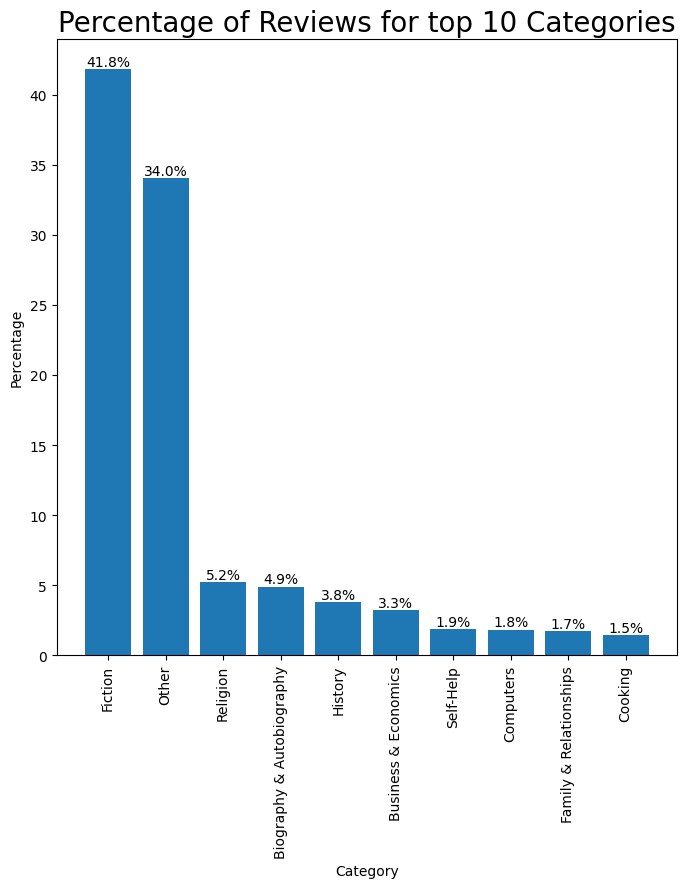

In [112]:
#Show a barplot by Percentages
category_percetage = df_all_data_filtered_processed['categories'].explode().value_counts(ascending=False)/df_all_data_filtered_processed['categories'].explode().value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_filtered_processed['categories'].explode().value_counts(ascending=False).keys(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

Top 10 Categories different than Other have a good representation on the Dataset. This variable is kept.

In [113]:
df_all_data_filtered_processed.shape

(15738, 7)

In [114]:
df_all_data_filtered_processed = df_all_data_filtered_processed.explode('categories')
df_all_data_filtered_processed.shape

(15738, 7)

In [115]:
df_all_data_filtered_processed.sample(5)

,review,text,review_year,publisher,categories,published_year,helpfulness
15633,1.0,This is a really awful book - embarrassingly b...,2007,Hachette UK,Other,2007,0.666667
872,5.0,"This book is excellent: readable, scholarly, h...",2007,NaN,Religion,2007,0.777778
4733,5.0,I purchased this book for my nephew who is hav...,2012,Frank Schaffer Publications Incorporated,Other,2005,1.000000
5856,4.0,This book was an especially good one in the se...,2013,Berkley,Fiction,2005,1.000000
12583,4.0,This book is honestly a little frightening if ...,2007,Simon and Schuster,Fiction,2005,1.000000


## Publisher Column

In [116]:
publisher_mapping = {
    'Penguin UK':'Penguin',
    'HarperCollins': 'Harper Collins',
    'HarperCollins UK' :  'Harper Collins',
    'Adams Media Corporation': 'Adams Media',
    'Addison Wesley Longman' : 'Addison-Wesley',
    'Addison Wesley Publishing Company':'Addison-Wesley',
    'Addison-Wesley Longman':'Addison-Wesley',
    'Addison-Wesley Professional' : 'Addison-Wesley',
    '''"O'Reilly Media, Inc."''' : "O'Reilly Media, Inc.",
    '*Frommers' : 'Frommers',
    '*Howell Book House' : 'Howell Book House',
    }

In [117]:
def standardize_publisher(publisher):
    if pd.isna(publisher):        
        return publisher  # Return the original value if it's not a list
    else:

        return publisher_mapping.get(publisher, publisher)

In [118]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(standardize_publisher)

In [119]:
publisher_counts = df_all_data_filtered_processed['publisher'].value_counts()
publisher_counts

publisher
Penguin                           1228
Harper Collins                     946
Simon and Schuster                 854
Mariner Books                      500
Random House                       358
                                  ... 
Bookman Publishing & Marketing       1
Basic Health Publications            1
Nbm Publishing Company               1
Infinite Ideas                       1
Dewi Lewis Pub                       1
Name: count, Length: 1806, dtype: int64

### Updating the publisher Feature to Categorical, and applying Pareto Principe to reduce the quantity of publishers.

In [120]:
sorted_publisher_counts = publisher_counts.sort_values(ascending=False)
sorted_publisher_counts[:25]

publisher
Penguin                       1228
Harper Collins                 946
Simon and Schuster             854
Mariner Books                  500
Random House                   358
Macmillan                      221
Vintage                        194
Houghton Mifflin Harcourt      172
Anchor                         171
Bantam                         166
John Wiley & Sons              162
The Floating Press             139
Hachette UK                    124
Baker Books                    118
Random House Digital, Inc.     113
Ballantine Books               102
W. W. Norton & Company         100
Bethany House                   95
Back Bay Books                  84
O'Reilly Media, Inc.            82
Little, Brown                   79
Oxford University Press         79
Sourcebooks, Inc.               78
Thomas Nelson                   78
Crown                           78
Name: count, dtype: int64

In [121]:
pareto_threshold = int(0.2 * len(sorted_publisher_counts))
pareto_threshold

361

In [122]:
top_publishers = sorted_publisher_counts.iloc[:pareto_threshold].index
top_publishers

Index(['Penguin', 'Harper Collins', 'Simon and Schuster', 'Mariner Books',
       'Random House', 'Macmillan', 'Vintage', 'Houghton Mifflin Harcourt',
       'Anchor', 'Bantam',
       ...
       'Liturgical Press', 'Rolling Home Press',
       'Dorchester Publishing Company Incorporated', 'Duke University Press',
       'Wildside Press LLC', 'Rizzoli Publications', 'Osote Pub',
       'Crown Archetype', 'Singel Uitgeverijen', 'Scholastic Paperbacks'],
      dtype='object', name='publisher', length=361)

In [123]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_publishers else 'Other')
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                       3971
Penguin                     1228
Harper Collins               946
Simon and Schuster           854
Mariner Books                500
                            ... 
Rizzoli Publications           5
Potomac Books, Inc.            5
Thomas Nelson Publishers       5
Rolling Home Press             5
Sams Publishing                5
Name: count, Length: 362, dtype: int64

After applying Pareto Principle, there are still 362 unique publishers on the dataset. If publishers is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 publishers with most reviews are kept and the rest of publishers are set to 'Other'. In order to keep the feature and analize the predicting power.

In [124]:
publishers = df_all_data_filtered_processed['publisher']
publishers.info()

<class 'pandas.core.series.Series'>
Index: 15738 entries, 0 to 15737
Series name: publisher
Non-Null Count  Dtype 
--------------  ----- 
15738 non-null  object
dtypes: object(1)
memory usage: 245.9+ KB


In [125]:
print(f'Total of Publishers: {len(publishers.unique())}')

Total of Publishers: 362


In [126]:
publisher_counts = publishers.value_counts(ascending=False)
publisher_counts

publisher
Other                       3971
Penguin                     1228
Harper Collins               946
Simon and Schuster           854
Mariner Books                500
                            ... 
Rizzoli Publications           5
Potomac Books, Inc.            5
Thomas Nelson Publishers       5
Rolling Home Press             5
Sams Publishing                5
Name: count, Length: 362, dtype: int64

In [127]:
top_10_publishers_counts = publisher_counts[:10].sort_values(ascending=False)
top_10_publishers_counts

publisher
Other                        3971
Penguin                      1228
Harper Collins                946
Simon and Schuster            854
Mariner Books                 500
Random House                  358
Macmillan                     221
Vintage                       194
Houghton Mifflin Harcourt     172
Anchor                        171
Name: count, dtype: int64

In [128]:
other_publishers_counts = publisher_counts[10:]
other_publishers_counts

publisher
Bantam                      166
John Wiley & Sons           162
The Floating Press          139
Hachette UK                 124
Baker Books                 118
                           ... 
Rizzoli Publications          5
Potomac Books, Inc.           5
Thomas Nelson Publishers      5
Rolling Home Press            5
Sams Publishing               5
Name: count, Length: 352, dtype: int64

In [129]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_10_publishers_counts else 'Other')
len(df_all_data_filtered_processed['publisher'].unique())

10

In [130]:
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                        11094
Penguin                       1228
Harper Collins                 946
Simon and Schuster             854
Mariner Books                  500
Random House                   358
Macmillan                      221
Vintage                        194
Houghton Mifflin Harcourt      172
Anchor                         171
Name: count, dtype: int64

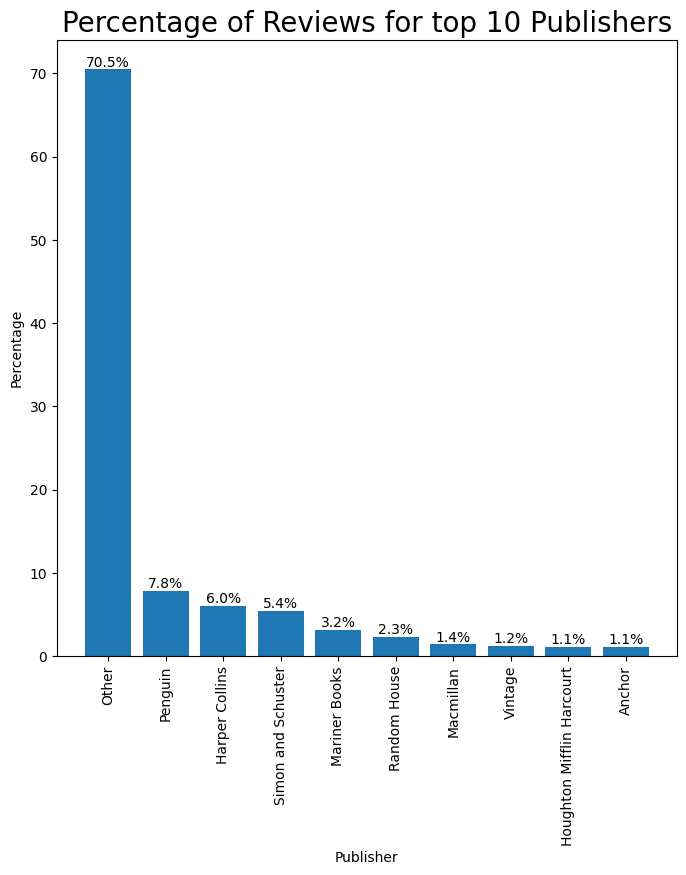

In [131]:
#Show a barplot by Percentages
publisher_percetage = df_all_data_filtered_processed['publisher'].value_counts(ascending=False)/df_all_data_filtered_processed['publisher'].value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_filtered_processed['publisher'].value_counts(ascending=False).keys(), publisher_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Publishers', fontsize = 20)
plt.show()


Top 10 publishers different than Other represents the 29.5% of the dataset. The representation of non-other publishers is low, but is grather than 25%, so the variable is kept.


# Processed Datasets Saving

In [132]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15738 entries, 0 to 15737
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15738 non-null  float64
 1   text            15738 non-null  object 
 2   review_year     15738 non-null  int64  
 3   publisher       15738 non-null  object 
 4   categories      15738 non-null  object 
 5   published_year  15738 non-null  int64  
 6   helpfulness     15738 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 983.6+ KB


In [133]:
df_all_data_filtered_processed.isna().sum()

review            0
text              0
review_year       0
publisher         0
categories        0
published_year    0
helpfulness       0
dtype: int64

In [134]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,publisher,categories,published_year,helpfulness
5685,5.0,This learned spiritual treatise on our God of ...,2011,Other,Religion,2005,1.0
14137,5.0,I really like the book. It was a fast quick re...,2013,Other,Fiction,2010,1.0
4028,5.0,"I've had the companion book, God at Eventide, ...",2012,Other,Religion,2006,1.0
954,5.0,One of the Absolute Best Ethics Books of all T...,2009,Vintage,Fiction,2008,0.5
7101,5.0,More people know about the story in relation t...,2012,Penguin,Fiction,2004,1.0
9723,5.0,She has taken a difficult task and put it into...,2013,Other,Other,2005,1.0
4116,4.0,As I am finding with all of the Harvard Busine...,2006,Other,Other,2005,1.0
3755,5.0,Delightful Little Einsteins book about caterpi...,2008,Other,Fiction,2008,1.0
10643,5.0,before I purchase a item I always research wha...,2009,Other,Other,2004,0.0
464,4.0,Possible spoilers in review!I'm an avid reader...,2006,Other,Other,2005,0.5


In [135]:
#A reduced Dataset is created to process Text Column and Apply sentiment Analysis.
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
4473,4473,"The Missing Piece captivated me. As a man, it ..."
4272,4272,This book explains a lot about what SANs are a...
7193,7193,This was an excellent book. It was the first I...
9371,9371,Red Dragon is my favorite out of the Hannibal ...
15435,15435,I've read all the 'In Death' novels and starte...
6075,6075,John Krakauer gives a well researched study of...
4223,4223,I bought this so my learning disabled students...
6088,6088,Purple Cow is a great book by a great writer. ...
3702,3702,"A fairly good book on doing funerals, it wasn'..."
3293,3293,This is a wonderful book. Some of it is challe...


In [136]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [137]:
df_reduced.to_csv('../data/processed/df_reduced.csv')